In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

sns.set(style="whitegrid")

csv_path = "wandb_data/1 broad sweep/"

In [4]:
df1 = pd.read_csv(csv_path + "1 conbandit noisynet-dqn.csv")
df11 = pd.read_csv(csv_path + "1 conbandit noisynet-dqn output_layer exploration_rate.csv")
df12 = pd.read_csv(csv_path + "1 conbandit noisynet-dqn distr_type exploration_rate.csv")
df2 = pd.read_csv(csv_path + "2 conbandit regular dqn.csv")
df3 = pd.read_csv(csv_path + "3 nnbandit noisynet-dqn.csv")
df31 = pd.read_csv(csv_path + "3 nnbandit noisynet-dqn output_layer exploration_rate.csv")
df32 = pd.read_csv(csv_path + "3 nnbandit noisynet-dqn distr_type exploration_rate.csv")
df4 = pd.read_csv(csv_path + "4 nnbandit regular dqn.csv")
df1['env'] = 'ContextualBandit-v2 NoisyNet-DQN'
df2['env'] = 'ContextualBandit-v2 regular DQN'
df3['env'] = 'NNBandit-v0 NoisyNet-DQN'
df4['env'] = 'NNBandit-v0 regular DQN'

def drop_min_max_columns(df):
    return df[[col for col in df.columns if not (col.endswith('__MIN') or col.endswith('__MAX'))]]

df11 = drop_min_max_columns(df11)
df12 = drop_min_max_columns(df12)
df31 = drop_min_max_columns(df31)
df32 = drop_min_max_columns(df32)

In [5]:
def reform(df, env, x_n, p, q):
    df_no_step = df.drop(columns='Step')
    mean_values = df_no_step.mean().reset_index()
    mean_values.columns = ['flag', 'exploration_rate_aggregate']
    mean_values[x_n] = mean_values['flag'].str.extract(fr'{x_n}: ({p}|{q})')
    # mean_values[x_n] = mean_values['noisy_output_layer'].map({'true': True, 'false': False})
    mean_values['env'] = env
    return mean_values[['env', x_n, 'exploration_rate_aggregate']]

_df11 = reform(df11, 'ContextualBandit-v2\nNoisyNet-DQN', 'noisy_output_layer', 'true', 'false')
_df12 = reform(df12, 'ContextualBandit-v2\nNoisyNet-DQN', 'noisy_layer_distr_type', 'uniform', 'normal')
_df31 = reform(df31, 'NNBandit-v0\nNoisyNet-DQN', 'noisy_output_layer', 'true', 'false')
_df32 = reform(df32, 'NNBandit-v0\nNoisyNet-DQN', 'noisy_layer_distr_type', 'uniform', 'normal')

In [6]:
_df12.head()

,env,noisy_layer_distr_type,exploration_rate_aggregate
0,ContextualBandit-v2\nNoisyNet-DQN,uniform,0.439513
1,ContextualBandit-v2\nNoisyNet-DQN,normal,0.488533


In [13]:
def plot_noisynet_metric(x_n, y_n, log_x):
    df1['env'] = 'ContextualBandit-v2 NoisyNet-DQN'
    df3['env'] = 'NNBandit-v0 NoisyNet-DQN'
    combined_df = pd.concat([df1, df3], ignore_index=True)

    plt.figure(figsize=(10, 2.5))
    if log_x: plt.xscale('log')
    
    # sns.lineplot(data=_df1, x=x_n, y=y_n, marker='o', label='ContextualBandit-v2 NoisyNet-DQN')
    # sns.lineplot(data=_df3, x=x_n, y=y_n, marker='^', label='NNBandit-v0 NoisyNet-DQN')
    sns.lineplot(
        data=combined_df,
        x=x_n,
        y=y_n,
        hue='env',
        style='env',
        markers=True,
        errorbar='se'
    )
    
    plt.xlabel(x_n)
    plt.ylabel(y_n)
    plt.title(f'{y_n} vs. {x_n}')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.savefig(f"results/{y_n}_vs_{x_n}.png", dpi=300, bbox_inches='tight')
    
    plt.show()

In [8]:
def plot_metric(x_n, y_n, log_x):
#     _df1 = df1.groupby(x_n)[y_n].mean().reset_index()
#     _df2 = df2.groupby(x_n)[y_n].mean().reset_index()
#     _df3 = df3.groupby(x_n)[y_n].mean().reset_index()
#     _df4 = df4.groupby(x_n)[y_n].mean().reset_index()
    df1['env'] = 'ContextualBandit-v2 NoisyNet-DQN'
    df2['env'] = 'ContextualBandit-v2 regular DQN'
    df3['env'] = 'NNBandit-v0 NoisyNet-DQN'
    df4['env'] = 'NNBandit-v0 regular DQN'
    combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
    
    plt.figure(figsize=(10, 2.5))
    if log_x: plt.xscale('log')
    
    # sns.lineplot(data=_df1, x=x_n, y=y_n, marker='o', label='ContextualBandit-v2 NoisyNet-DQN')
    # sns.lineplot(data=_df2, x=x_n, y=y_n, marker='s', label='ContextualBandit-v2 regular DQN')
    # sns.lineplot(data=_df3, x=x_n, y=y_n, marker='^', label='NNBandit-v0 NoisyNet-DQN')
    # sns.lineplot(data=_df4, x=x_n, y=y_n, marker='D', label='NNBandit-v0 regular DQN')
    sns.lineplot(
        data=combined_df,
        x=x_n,
        y=y_n,
        hue='env',
        style='env',
        markers=True,
        errorbar='se'
    )
    
    plt.xlabel(x_n)
    plt.ylabel(y_n)
    plt.title(f'{y_n} vs. {x_n}')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.savefig(f"results/{y_n}_vs_{x_n}.png", dpi=300, bbox_inches='tight')
    
    plt.show()

In [9]:
def delta(a, b):
    return abs(a-b)
    # return a/b if a>b else b/a
    # return a/b

def barplot_metric(x_n, y_n, p, q):
    df1['env'] = 'ContextualBandit-v2\nNoisyNet-DQN'
    df2['env'] = 'ContextualBandit-v2\nregular DQN'
    df3['env'] = 'NNBandit-v0\nNoisyNet-DQN'
    df4['env'] = 'NNBandit-v0\nregular DQN'

    all_dfs = [df1, df2, df3, df4]
    envs = [
        'ContextualBandit-v2\nNoisyNet-DQN',
        'ContextualBandit-v2\nregular DQN',
        'NNBandit-v0\nNoisyNet-DQN',
        'NNBandit-v0\nregular DQN'
    ]

    delta_data = []

    for df, env in zip(all_dfs, envs):
        df_p = df[df[x_n] == p][[y_n]].reset_index(drop=True)
        df_q = df[df[x_n] == q][[y_n]].reset_index(drop=True)

        min_len = min(len(df_p), len(df_q))
        df_p = df_p.iloc[:min_len]
        df_q = df_q.iloc[:min_len]

        deltas = delta(df_p[y_n], df_q[y_n])

        env_df = pd.DataFrame({'delta': deltas, 'env': env})
        delta_data.append(env_df)

    result_df = pd.concat(delta_data, ignore_index=True)

    plt.figure(figsize=(10, 2.5))
    sns.barplot(data=result_df, x='env', y='delta', palette='colorblind', ci='sd')

    plt.xlabel('Environment')
    plt.ylabel(f'Delta of {y_n} ({p} vs {q})')
    plt.title(f'{y_n} difference for {p} vs {q} across environments')

    plt.tight_layout()
    plt.savefig(f"results/{y_n}_vs_{x_n}_delta.png", dpi=300, bbox_inches='tight')
    plt.show()

In [10]:
def grouped_barplot_metric(x_n, y_n):
    df1['env'] = 'ContextualBandit-v2\nNoisyNet-DQN'
    df2['env'] = 'ContextualBandit-v2\nregular DQN'
    df3['env'] = 'NNBandit-v0\nNoisyNet-DQN'
    df4['env'] = 'NNBandit-v0\nregular DQN'

    combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

    plt.figure(figsize=(10, 4))
    sns.barplot(
        data=combined_df,
        x='env',
        y=y_n,
        hue=x_n,
        palette='colorblind',
        errorbar='se'
    )

    plt.xlabel('Environment')
    plt.ylabel(y_n)
    plt.tight_layout()
    plt.legend(title=x_n, loc='lower left')

    plt.savefig(f"results/{y_n}_vs_{x_n}.png", dpi=300, bbox_inches='tight')
    plt.show()


In [11]:
def grouped_barplot_noisynet_metric(x_n, y_n):
    df1['env'] = 'ContextualBandit-v2\nNoisyNet-DQN'
    df3['env'] = 'NNBandit-v0\nNoisyNet-DQN'

    combined_df = pd.concat([df1, df3], ignore_index=True)
    
    plt.figure(figsize=(10, 4))
    sns.barplot(
        data=combined_df,
        x='env',
        y=y_n,
        hue=x_n,
        palette='colorblind',
        errorbar='se'
    )

    plt.xlabel('Environment')
    plt.ylabel(y_n)
    plt.tight_layout()
    plt.legend(title=x_n, loc='lower left')
    
    plt.savefig(f"results/{y_n}_vs_{x_n}.png", dpi=300, bbox_inches='tight')
    plt.show()


                                        Name  noisy_layer_init_std  \
0  conbandit_combi1_0__862__2025-06-28_17-38               10000.0   
1  conbandit_combi1_0__859__2025-06-28_17-34               10000.0   
2  conbandit_combi1_0__811__2025-06-28_17-42               10000.0   
3  conbandit_combi1_0__454__2025-06-28_17-32               10000.0   
4  conbandit_combi1_0__324__2025-06-28_17-37               10000.0   

       regret  noisy_reward  hidden_layer_size noisy_layer_distr_type  seed  \
0  835.091727         False                 20                uniform   862   
1  832.760886          True                 20                uniform   859   
2  837.159973         False                 80                 normal   811   
3  734.897094         False                  8                uniform   454   
4  846.566348          True                 40                 normal   324   

   noisy_output_layer  _wandb                               env  
0               False     NaN  Context

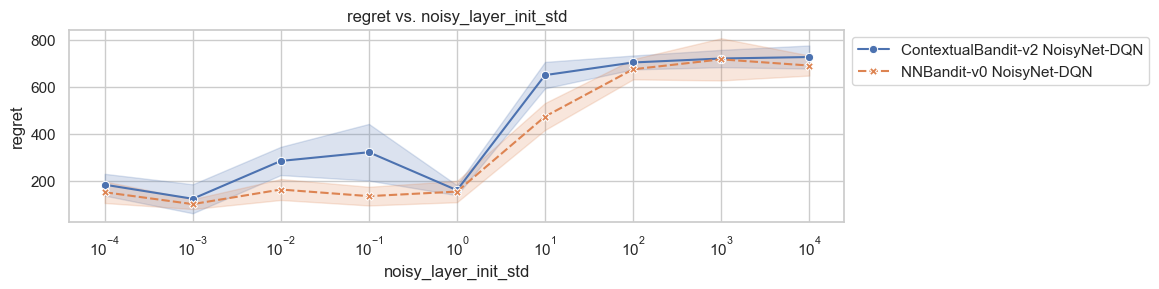

In [12]:
plot_noisynet_metric('noisy_layer_init_std','regret',True)

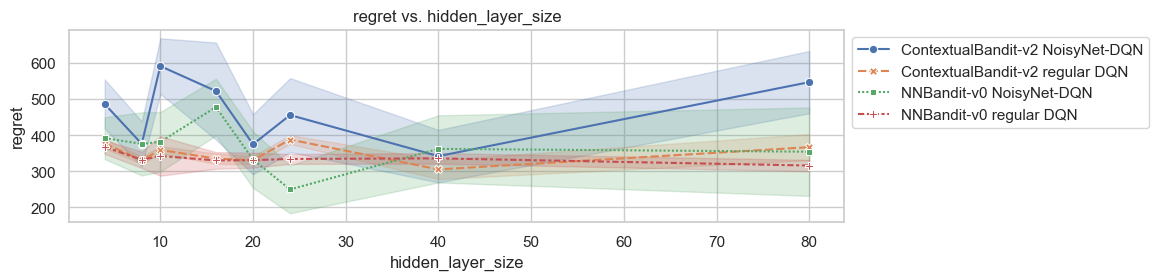

In [88]:
plot_metric('hidden_layer_size','regret',False)

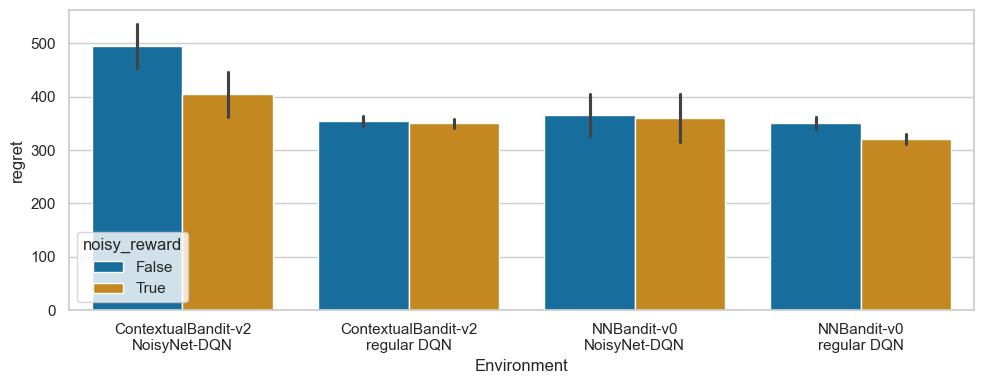

In [89]:
grouped_barplot_metric('noisy_reward','regret', True, False)

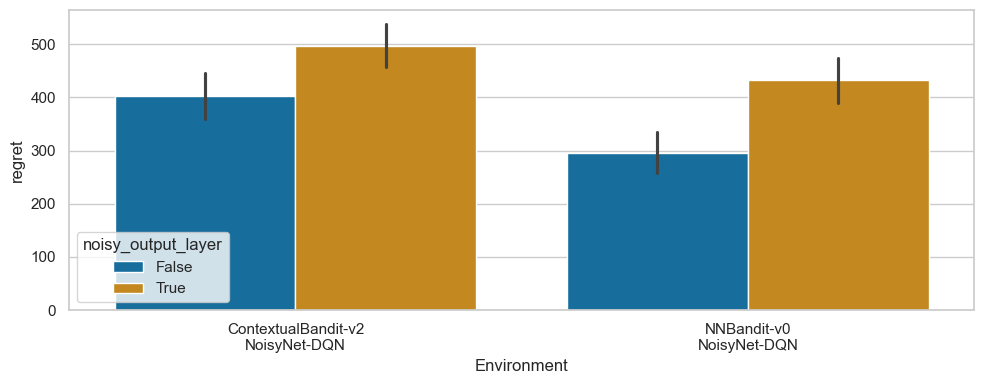

In [187]:
grouped_barplot_noisynet_metric('noisy_output_layer','regret')

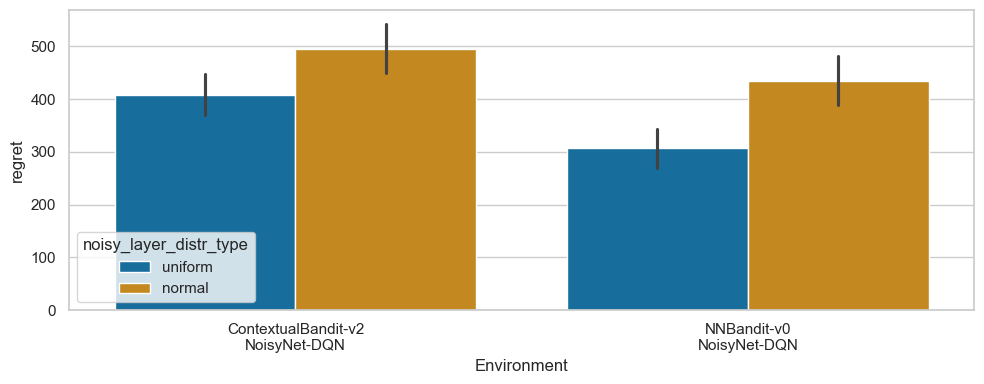

In [188]:
grouped_barplot_noisynet_metric('noisy_layer_distr_type','regret')

In [263]:
x_n = 'noisy_output_layer'
y_n = 'regret'

df1['env'] = 'ContextualBandit-v2\nNoisyNet-DQN'
df3['env'] = 'NNBandit-v0\nNoisyNet-DQN'

combined_df = pd.concat([df1, df3], ignore_index=True)
exploration_df = pd.concat([_df11, _df31], ignore_index=True)

exploration_df.head()

,env,noisy_output_layer,exploration_rate_aggregate
0,ContextualBandit-v2\nNoisyNet-DQN,false,0.375327
1,ContextualBandit-v2\nNoisyNet-DQN,true,0.557784
2,NNBandit-v0\nNoisyNet-DQN,true,0.493923
3,NNBandit-v0\nNoisyNet-DQN,false,0.325490


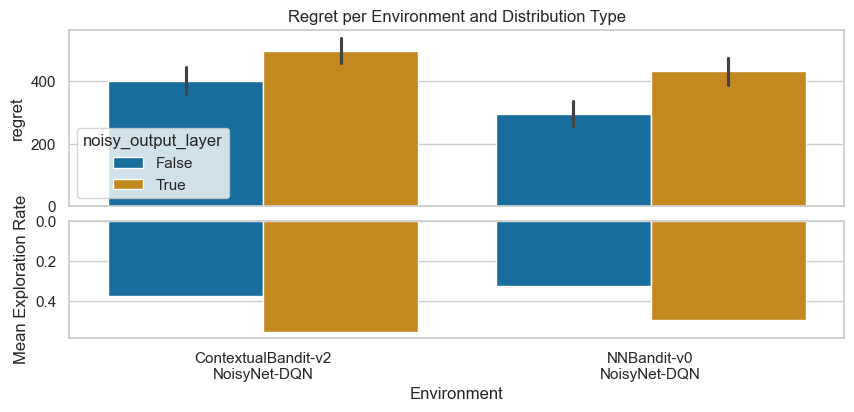

In [264]:
fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,2])

ax1 = fig.add_subplot(gs[0])
sns.barplot(
    data=combined_df,
    x='env',
    y=y_n,
    hue=x_n,
    palette='colorblind',
    errorbar='se',
    ax=ax1
)
ax1.set_ylabel(y_n)
ax1.set_xlabel('')  
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax1.legend(title=x_n, loc='lower left')
ax1.set_title('Regret per Environment and Distribution Type')

ax2 = fig.add_subplot(gs[1], sharex=ax1)
sns.barplot(
    data=exploration_df,
    x='env',
    y='exploration_rate_aggregate',
    hue=x_n,
    palette='colorblind',
    dodge=True,
    ax=ax2
)
ax2.set_ylabel('Mean Exploration Rate')
ax2.set_xlabel('Environment')
ax2.set_title('')
ax2.invert_yaxis()
ax2.get_legend().remove()

plt.subplots_adjust(hspace=0.1)
plt.savefig(f"results/{y_n}_vs_{x_n}_with_exploration_rate.png", dpi=300, bbox_inches='tight')
plt.show()

In [256]:
x_n = 'noisy_layer_distr_type'
y_n = 'regret'

df1['env'] = 'ContextualBandit-v2\nNoisyNet-DQN'
df3['env'] = 'NNBandit-v0\nNoisyNet-DQN'

combined_df = pd.concat([df1, df3], ignore_index=True)
exploration_df = pd.concat([_df12, _df32], ignore_index=True)

exploration_df.head()

,env,noisy_layer_distr_type,exploration_rate_aggregate
0,ContextualBandit-v2\nNoisyNet-DQN,uniform,0.439513
1,ContextualBandit-v2\nNoisyNet-DQN,normal,0.488533
2,NNBandit-v0\nNoisyNet-DQN,uniform,0.344412
3,NNBandit-v0\nNoisyNet-DQN,normal,0.488982


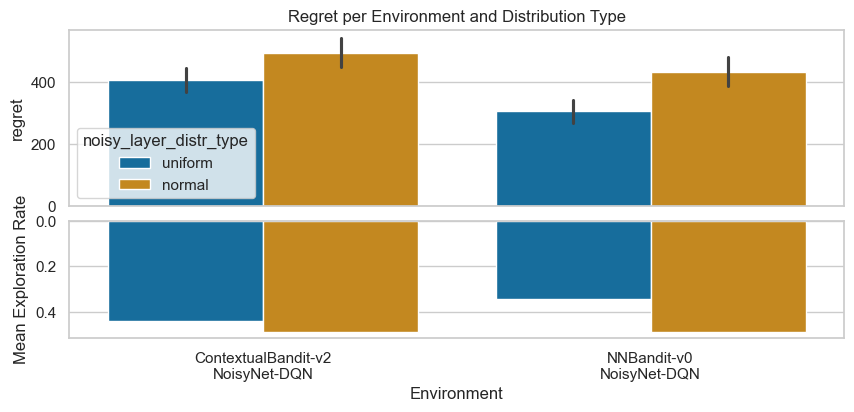

In [261]:
fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(2, 1, height_ratios=[3,2])

ax1 = fig.add_subplot(gs[0])
sns.barplot(
    data=combined_df,
    x='env',
    y=y_n,
    hue=x_n,
    palette='colorblind',
    errorbar='se',
    ax=ax1
)
ax1.set_ylabel(y_n)
ax1.set_xlabel('')  
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax1.legend(title=x_n, loc='lower left')
ax1.set_title('Regret per Environment and Distribution Type')

ax2 = fig.add_subplot(gs[1], sharex=ax1)
sns.barplot(
    data=exploration_df,
    x='env',
    y='exploration_rate_aggregate',
    hue=x_n,
    palette='colorblind',
    dodge=True,
    ax=ax2
)
ax2.set_ylabel('Mean Exploration Rate')
ax2.set_xlabel('Environment')
ax2.set_title('')
ax2.invert_yaxis()
ax2.get_legend().remove()

plt.subplots_adjust(hspace=0.1)
plt.savefig(f"results/{y_n}_vs_{x_n}_with_exploration_rate.png", dpi=300, bbox_inches='tight')
plt.show()

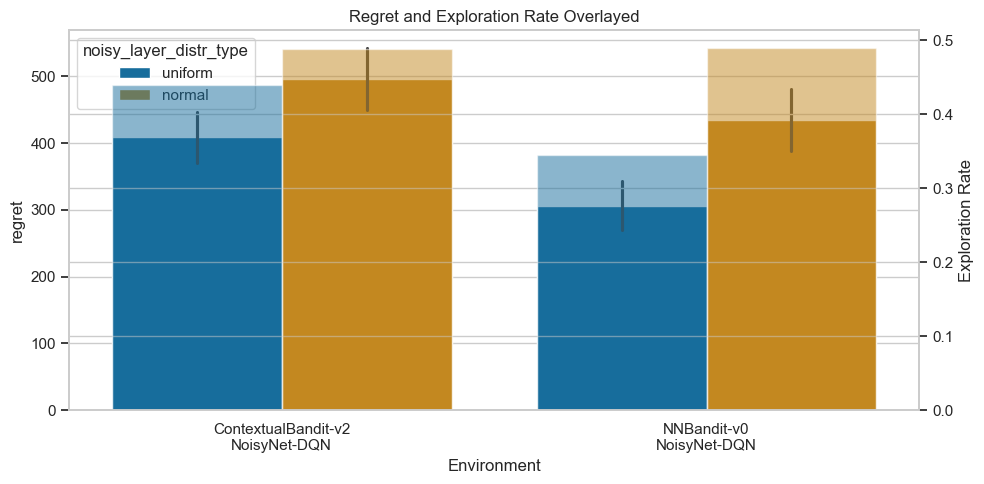

In [226]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot regret on left y-axis
sns.barplot(
    data=combined_df,
    x='env',
    y=y_n,
    hue=x_n,
    palette='colorblind',
    errorbar='se',
    ax=ax1
)
ax1.set_ylabel(y_n)
ax1.set_xlabel('Environment')

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()

# Plot exploration_rate_aggregate on right y-axis
sns.barplot(
    data=exploration_df,
    x='env',
    y='exploration_rate_aggregate',
    hue=x_n,
    palette='colorblind',
    dodge=True,
    ax=ax2,
    alpha=0.5  # semi-transparent so bars can be seen
)
ax2.set_ylabel('Exploration Rate')

# To avoid duplicate legends:
ax1.legend(title=x_n, loc='upper left')
ax2.get_legend().remove()

plt.title("Regret and Exploration Rate Overlayed")
plt.tight_layout()
plt.show()
